In [2]:
ZOTUTAB_PATH = 'PRJNA594535_unifrac/zotutab.txt'

import pandas as pd
import numpy as np

zotutab = pd.read_csv(ZOTUTAB_PATH, sep='\t', index_col=0)

In [3]:
import re

samples_info = pd.read_csv('sra_runinfo_PRJNA594535.csv')
samples_info['category'] = samples_info['LibraryName'].apply(lambda x: re.sub(r'_(M0|\d+)$', '', x))
samples_info['treated'] = samples_info['category'].apply(lambda x: True if re.search(r'INU$', x) else False)
samples_info

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash,category,treated
0,SRR10615525,2020-02-20 08:11:39,2019-12-10 08:37:41,81700,34314000,81700,420,17,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,6DD6D46EB2DA9FAD7AAF1C6E22EA8751,718C028F9C4C5E76FC901114D58287C0,D1_H,False
1,SRR10615524,2020-02-20 08:11:39,2019-12-10 08:37:29,88896,37336320,88896,420,18,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,F65D0CC179611CC7EA350B06AA5675FA,33B436DB6D3F894F38FA9AE68D61CEF9,D4_H,False
2,SRR10615523,2020-02-20 08:11:40,2019-12-10 08:37:33,86615,36378300,86615,420,19,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,BF0799FFB3D4841BBB77C04B4EEDEFBC,E51984BEA23949D21058E0D15DED2534,D2_H,False
3,SRR10615521,2020-02-20 08:11:39,2019-12-10 08:37:21,77571,32579820,77571,420,17,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,A4CB9BBF01743CBB9C9C99564F220EFA,02EBBDBF95420E75EABDC7524802947B,D3_H,False
4,SRR10615570,2020-02-20 08:11:37,2019-12-10 08:39:05,70827,29747340,70827,420,15,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,142F9FFCBA2E22B677735E687D2ED2C1,2F020E582FCED8C65422639617116056,CTRL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SRR10615575,2020-02-20 08:11:37,2019-12-10 08:39:14,85859,36060780,85859,420,18,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,9828E0DEC435863E080B3E788062C8C2,BB2F0FE25D9292FEFD47B412F8051337,D4-INU,True
67,SRR10615574,2020-02-20 08:11:37,2019-12-10 08:39:15,97661,41017620,97661,420,20,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,6C2486E9C4C0C296A05533D27F063A01,FA55348F4B570889DFDAAD58ADF0128B,D4-INU,True
68,SRR10615573,2020-02-20 08:11:37,2019-12-10 08:39:09,84413,35453460,84413,420,17,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,469BD9B766D48447B368FB2AC9C57B77,D0793D457F465BE9CF273196777F3225,D4,False
69,SRR10615572,2020-02-20 08:11:38,2019-12-10 08:39:09,67391,28304220,67391,420,14,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,UNIVERSITE CATHOLIQUE DE LOUVAIN,SRA1009033,NaN,public,A2D7DA5F787B9449AB43450CAF2A936A,7B64EE566419BA941E4DD59B47CDCF4A,D4,False


In [4]:
samples_to_use = samples_info.loc[samples_info['treated'] == False]['Run'].values
len(samples_to_use)

44

In [5]:
# kmeans clustering
from sklearn.cluster import OPTICS, cluster_optics_dbscan

zotub_transposed = zotutab[samples_to_use].T
kmeans = OPTICS(min_samples=5).fit(zotub_transposed)
zotub_transposed['cluster'] = kmeans.labels_

In [6]:
zotub_transposed

#OTU ID,Zotu1,Zotu145,Zotu40,Zotu44,Zotu2,Zotu121,Zotu215,Zotu208,Zotu3,Zotu4,...,Zotu2155,Zotu3510,Zotu3664,Zotu2777,Zotu2480,Zotu2618,Zotu3704,Zotu1068,Zotu1258,cluster
SRR10615525,3,0,717,0,0,0,0,0,62,47,...,0,0,0,0,0,0,0,0,0,-1
SRR10615524,0,6,99,175,3,0,6,9,1476,1310,...,33,10,28,20,0,0,0,0,0,2
SRR10615523,1,0,621,0,0,0,1,0,21,13,...,0,0,0,0,0,0,0,0,0,-1
SRR10615521,15,0,0,1,23,0,0,0,33,47,...,0,0,0,0,0,0,0,0,0,-1
SRR10615570,1084,0,0,0,1003,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR10615569,1160,0,0,0,1166,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR10615568,1269,0,0,0,1197,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
SRR10615567,809,0,0,0,775,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
SRR10615565,1197,0,0,0,1078,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
SRR10615564,971,0,0,0,984,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0


In [7]:
samples_categories = pd.DataFrame({'cluster': zotub_transposed['cluster']})

samples_categories['real_label'] = [samples_info[samples_info['Run'] == sample]['category'].values[0] for sample in samples_categories.index]
samples_categories_without_index = samples_categories.reset_index(drop=True)
clusters = samples_categories_without_index.groupby('cluster').agg(lambda x: x)
clusters

,real_label
cluster,
-1,"[D1_H, D2_H, D3_H, D1, D1, D1, D1, D1, D1, D3,..."
0,"[CTRL, CTRL, CTRL, CTRL, CTRL, CTRL, CTRL, CTR..."
1,"[D2, D2, D2, D2, D2]"
2,"[D4_H, D4, D4, D4, D4, D4, D4, D4, D4, D4]"


In [8]:
for cluster in clusters.index:
    cats, counts = np.unique(clusters.loc[cluster]['real_label'], return_counts=True)
    print(f'Cluster {cluster}:')
    for cat, count in zip(cats, counts):
        print(f'{cat}: {count}')

Cluster -1:
D1: 6
D1_H: 1
D2_H: 1
D3: 6
D3_H: 1
Cluster 0:
CTRL: 14
Cluster 1:
D2: 5
Cluster 2:
D4: 9
D4_H: 1


# Clustering with unifrac distance matrix

In [9]:
unifrac_distances = pd.read_csv('PRJNA594535_unifrac/distance_matrix.tsv', sep='\t', index_col=0, skiprows=1)
unifrac_distances

,SRR10615519,SRR10615520,SRR10615521,SRR10615522,SRR10615523,SRR10615524,SRR10615525,SRR10615526,SRR10615527,SRR10615528,...,SRR10615580,SRR10615581,SRR10615582,SRR10615583,SRR10615584,SRR10615585,SRR10615586,SRR10615587,SRR10615588,SRR10615589
#OTU ID,,,,,,,,,,,,,,,,,,,,,
SRR10615519,0.000000,0.335469,0.792392,0.795064,0.888397,0.733873,0.812312,0.742830,0.760760,0.804583,...,0.517784,0.707088,0.666571,0.654218,0.645669,0.641466,0.648428,0.365019,0.741153,0.761085
SRR10615520,0.335469,0.000000,0.816719,0.828391,0.887145,0.728019,0.850695,0.770739,0.789864,0.833910,...,0.471253,0.711255,0.712865,0.664947,0.702169,0.650363,0.669250,0.296260,0.762395,0.804305
SRR10615521,0.792392,0.816719,0.000000,0.888598,0.716878,0.746086,0.523357,0.679539,0.665867,0.626515,...,0.807134,0.821609,0.824720,0.793808,0.852485,0.845668,0.852085,0.847534,0.853785,0.885714
SRR10615522,0.795064,0.828391,0.888598,0.000000,0.879876,0.890843,0.842845,0.829643,0.832345,0.824307,...,0.841583,0.929088,0.930063,0.867998,0.828289,0.855590,0.902465,0.817694,0.461210,0.374716
SRR10615523,0.888397,0.887145,0.716878,0.879876,0.000000,0.688097,0.592617,0.838670,0.831745,0.820243,...,0.837540,0.851485,0.854478,0.819816,0.827358,0.818402,0.863391,0.902285,0.855941,0.887915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR10615585,0.641466,0.650363,0.845668,0.855590,0.818402,0.694597,0.814986,0.711830,0.720897,0.768927,...,0.459052,0.693090,0.629504,0.613532,0.309370,0.000000,0.631466,0.637918,0.773429,0.836066
SRR10615586,0.648428,0.669250,0.852085,0.902465,0.863391,0.708589,0.836954,0.805474,0.795789,0.796902,...,0.584772,0.445109,0.368698,0.438997,0.620231,0.631466,0.000000,0.708896,0.852572,0.905273
SRR10615587,0.365019,0.296260,0.847534,0.817694,0.902285,0.767248,0.876768,0.749672,0.767522,0.810567,...,0.395494,0.714326,0.687939,0.644218,0.678068,0.637918,0.708896,0.000000,0.784511,0.812200


In [10]:
samples_to_use = [sample for sample in samples_to_use if sample in unifrac_distances.index]
len(samples_to_use)

44

In [11]:
unifrac_distances = unifrac_distances.loc[samples_to_use, samples_to_use]
unifrac_distances

,SRR10615525,SRR10615524,SRR10615523,SRR10615521,SRR10615570,SRR10615569,SRR10615568,SRR10615567,SRR10615565,SRR10615564,...,SRR10615522,SRR10615520,SRR10615519,SRR10615587,SRR10615580,SRR10615579,SRR10615578,SRR10615573,SRR10615572,SRR10615571
#OTU ID,,,,,,,,,,,,,,,,,,,,,
SRR10615525,0.000000,0.679739,0.592617,0.523357,0.878412,0.859298,0.850830,0.861021,0.873922,0.877590,...,0.842845,0.850695,0.812312,0.876768,0.813274,0.816835,0.860659,0.823395,0.855680,0.833268
SRR10615524,0.679739,0.000000,0.688097,0.746086,0.908037,0.901773,0.911727,0.902152,0.892761,0.918903,...,0.890843,0.728019,0.733873,0.767248,0.691522,0.662791,0.720805,0.718583,0.749274,0.679878
SRR10615523,0.592617,0.688097,0.000000,0.716878,0.912371,0.893047,0.894760,0.903292,0.908358,0.916252,...,0.879876,0.887145,0.888397,0.902285,0.837540,0.834862,0.843466,0.819733,0.846050,0.807524
SRR10615521,0.523357,0.746086,0.716878,0.000000,0.888604,0.877590,0.873566,0.876549,0.883627,0.888639,...,0.888598,0.816719,0.792392,0.847534,0.807134,0.799287,0.843568,0.839309,0.849549,0.847185
SRR10615570,0.878412,0.908037,0.912371,0.888604,0.000000,0.231687,0.327131,0.248049,0.276972,0.287370,...,0.401984,0.804160,0.778489,0.793838,0.854543,0.846780,0.852777,0.821149,0.782488,0.812033
SRR10615569,0.859298,0.901773,0.893047,0.877590,0.231687,0.000000,0.270636,0.242796,0.330725,0.294725,...,0.400501,0.795261,0.781790,0.813114,0.864895,0.849923,0.855408,0.813973,0.789724,0.809870
SRR10615568,0.850830,0.911727,0.894760,0.873566,0.327131,0.270636,0.000000,0.341751,0.430572,0.356795,...,0.428451,0.790202,0.756169,0.799027,0.861262,0.853233,0.842521,0.834113,0.776875,0.825340
SRR10615567,0.861021,0.902152,0.903292,0.876549,0.248049,0.242796,0.341751,0.000000,0.258955,0.236021,...,0.412955,0.818363,0.788832,0.821070,0.841454,0.832754,0.821992,0.810104,0.785125,0.800749
SRR10615565,0.873922,0.892761,0.908358,0.883627,0.276972,0.330725,0.430572,0.258955,0.000000,0.384205,...,0.313722,0.820955,0.803815,0.823723,0.840510,0.831097,0.837328,0.820595,0.812982,0.817516


In [12]:
from sklearn.cluster import OPTICS
dbscan = OPTICS(min_samples=5).fit(unifrac_distances)
df = pd.DataFrame({'cluster': dbscan.labels_}, index=unifrac_distances.index)
df

,cluster
#OTU ID,
SRR10615525,-1
SRR10615524,-1
SRR10615523,-1
SRR10615521,-1
SRR10615570,4
SRR10615569,4
SRR10615568,4
SRR10615567,4
SRR10615565,4


In [13]:
df['real_label'] = [samples_info[samples_info['Run'] == sample]['category'].values[0] for sample in unifrac_distances.index]
clusters = df.groupby('cluster').agg(lambda x: x)
clusters

,real_label
cluster,
-1,"[D1_H, D4_H, D2_H, D3_H, CTRL, CTRL, CTRL, CTR..."
0,"[D3, D3, D3, D3, D3, D3]"
1,"[D2, D2, D2, D2, D2]"
2,"[D1, D1, D1, D1, D1, D1]"
3,"[D4, D4, D4, D4, D4, D4, D4, D4, D4]"
4,"[CTRL, CTRL, CTRL, CTRL, CTRL, CTRL, CTRL]"


In [14]:
for cluster in clusters.index:
    cats, counts = np.unique(clusters.loc[cluster]['real_label'], return_counts=True)
    print(f'Cluster {cluster}:')
    for cat, count in zip(cats, counts):
        print(f'{cat}: {count}')

Cluster -1:
CTRL: 7
D1_H: 1
D2_H: 1
D3_H: 1
D4_H: 1
Cluster 0:
D3: 6
Cluster 1:
D2: 5
Cluster 2:
D1: 6
Cluster 3:
D4: 9
Cluster 4:
CTRL: 7


/home/manuel/projects/biologia_computacional/proyecto/.venv/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.02383000766101331 and the largest is 3.4788331193146123.
  warn(


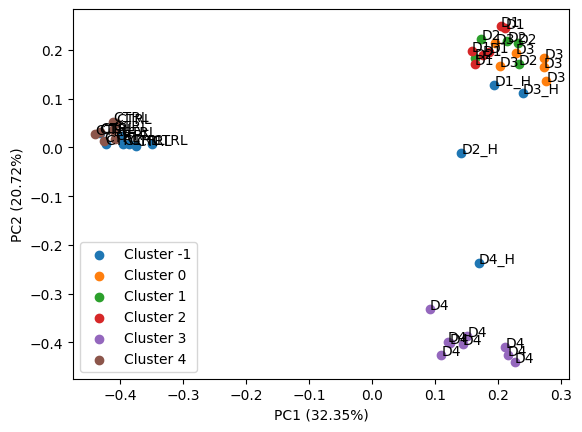

In [17]:
# PCoA plot
from skbio.stats.ordination import pcoa
from skbio import DistanceMatrix
import matplotlib.pyplot as plt

distance_matrix = DistanceMatrix(unifrac_distances)
pcoa_results = pcoa(distance_matrix)

pcoa_results.samples['cluster'] = dbscan.labels_
pcoa_results.samples['real_label'] = [samples_info[samples_info['Run'] == sample]['category'].values[0] for sample in unifrac_distances.index]

fig, ax = plt.subplots()
for cluster in np.unique(pcoa_results.samples['cluster']):
    df_cluster = pcoa_results.samples[pcoa_results.samples['cluster'] == cluster]
    ax.scatter(df_cluster['PC1'], df_cluster['PC2'], label=f'Cluster {cluster}')
    # Add text label with real label
    for i, row in enumerate(df_cluster.iterrows()):
        ax.annotate(row[1]['real_label'], (row[1]['PC1'], row[1]['PC2']))

# Show var explained by component on the axes
ax.set_xlabel(f'PC1 ({pcoa_results.proportion_explained.iloc[0] * 100:.2f}%)')
ax.set_ylabel(f'PC2 ({pcoa_results.proportion_explained.iloc[1] * 100:.2f}%)')

ax.legend()
plt.show()

## Clustering with weighted UniFrac

In [18]:
unifrac_distances = pd.read_csv('PRJNA594535_unifrac/weighted_distance_matrix.tsv', sep='\t', index_col=0)
unifrac_distances

,SRR10615519,SRR10615520,SRR10615521,SRR10615522,SRR10615523,SRR10615524,SRR10615525,SRR10615526,SRR10615527,SRR10615528,...,SRR10615580,SRR10615581,SRR10615582,SRR10615583,SRR10615584,SRR10615585,SRR10615586,SRR10615587,SRR10615588,SRR10615589
SRR10615519,0.000000,0.020385,0.123634,0.106629,0.127149,0.103011,0.135766,0.118242,0.107008,0.110973,...,0.048756,0.092559,0.089445,0.091334,0.077485,0.072929,0.089411,0.019996,0.101583,0.094301
SRR10615520,0.020385,0.000000,0.126014,0.106445,0.130233,0.109151,0.139296,0.122305,0.111210,0.115664,...,0.057077,0.096523,0.097210,0.095409,0.080693,0.078511,0.096484,0.026782,0.104041,0.094994
SRR10615521,0.123634,0.126014,0.000000,0.119813,0.078484,0.107233,0.068151,0.098713,0.095041,0.101364,...,0.109727,0.121965,0.118144,0.115147,0.120161,0.122886,0.125659,0.120713,0.116881,0.121015
SRR10615522,0.106629,0.106445,0.119813,0.000000,0.122800,0.126726,0.134663,0.107590,0.101782,0.107080,...,0.117026,0.138383,0.141171,0.138883,0.119651,0.122598,0.136247,0.104896,0.056163,0.055255
SRR10615523,0.127149,0.130233,0.078484,0.122800,0.000000,0.092562,0.060801,0.117330,0.112814,0.117660,...,0.108840,0.120881,0.113106,0.109529,0.106735,0.113636,0.116585,0.124767,0.122339,0.122732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR10615585,0.072929,0.078511,0.122886,0.122598,0.113636,0.106031,0.125335,0.114997,0.102670,0.107791,...,0.052945,0.060072,0.050592,0.051925,0.021539,0.000000,0.041053,0.078839,0.107062,0.111127
SRR10615586,0.089411,0.096484,0.125659,0.136247,0.116585,0.105856,0.120447,0.116201,0.109068,0.106163,...,0.060624,0.030860,0.023155,0.027367,0.043215,0.041053,0.000000,0.095028,0.119238,0.124595
SRR10615587,0.019996,0.026782,0.120713,0.104896,0.124767,0.093471,0.132859,0.113560,0.102888,0.106995,...,0.048073,0.090663,0.091610,0.090274,0.078737,0.078839,0.095028,0.000000,0.101221,0.093111
SRR10615588,0.101583,0.104041,0.116881,0.056163,0.122339,0.125592,0.125235,0.094213,0.083440,0.085135,...,0.102386,0.115741,0.119109,0.118910,0.102614,0.107062,0.119238,0.101221,0.000000,0.042049


In [19]:
samples_to_use = [sample for sample in samples_to_use if sample in unifrac_distances.index]
len(samples_to_use)

44

In [20]:
unifrac_distances = unifrac_distances.loc[samples_to_use, samples_to_use]
unifrac_distances

,SRR10615525,SRR10615524,SRR10615523,SRR10615521,SRR10615570,SRR10615569,SRR10615568,SRR10615567,SRR10615565,SRR10615564,...,SRR10615522,SRR10615520,SRR10615519,SRR10615587,SRR10615580,SRR10615579,SRR10615578,SRR10615573,SRR10615572,SRR10615571
SRR10615525,0.000000,0.108291,0.060801,0.068151,0.136629,0.131485,0.132422,0.131911,0.132747,0.131111,...,0.134663,0.139296,0.135766,0.132859,0.115099,0.116392,0.117286,0.108071,0.113529,0.121628
SRR10615524,0.108291,0.000000,0.092562,0.107233,0.131095,0.127830,0.132365,0.128221,0.128982,0.128231,...,0.126726,0.109151,0.103011,0.093471,0.082739,0.086836,0.078557,0.085624,0.087411,0.088650
SRR10615523,0.060801,0.092562,0.000000,0.078484,0.128627,0.124831,0.127797,0.125795,0.127848,0.125655,...,0.122800,0.130233,0.127149,0.124767,0.108840,0.109423,0.109510,0.099873,0.106739,0.114582
SRR10615521,0.068151,0.107233,0.078484,0.000000,0.121502,0.119709,0.120253,0.117448,0.120311,0.116050,...,0.119813,0.126014,0.123634,0.120713,0.109727,0.111691,0.110131,0.106802,0.110671,0.115704
SRR10615570,0.136629,0.131095,0.128627,0.121502,0.000000,0.035196,0.036129,0.031445,0.036739,0.042193,...,0.047919,0.097464,0.096006,0.096158,0.104696,0.102180,0.101238,0.102292,0.100459,0.101999
SRR10615569,0.131485,0.127830,0.124831,0.119709,0.035196,0.000000,0.036693,0.040884,0.035431,0.049708,...,0.054007,0.099531,0.097110,0.095541,0.100951,0.099275,0.095378,0.100009,0.098186,0.098748
SRR10615568,0.132422,0.132365,0.127797,0.120253,0.036129,0.036693,0.000000,0.040354,0.045624,0.047891,...,0.060735,0.095738,0.093221,0.092068,0.096588,0.094626,0.091326,0.095838,0.094337,0.095909
SRR10615567,0.131911,0.128221,0.125795,0.117448,0.031445,0.040884,0.040354,0.000000,0.033155,0.034249,...,0.057788,0.103684,0.102231,0.100543,0.103560,0.102548,0.099417,0.102306,0.101235,0.101836
SRR10615565,0.132747,0.128982,0.127848,0.120311,0.036739,0.035431,0.045624,0.033155,0.000000,0.049543,...,0.052615,0.103908,0.103352,0.100285,0.105606,0.103634,0.101401,0.104398,0.102723,0.105564
SRR10615564,0.131111,0.128231,0.125655,0.116050,0.042193,0.049708,0.047891,0.034249,0.049543,0.000000,...,0.053613,0.109050,0.108239,0.106865,0.110319,0.110145,0.106606,0.109932,0.108162,0.110194


In [21]:
dbscan = OPTICS(min_samples=5).fit(unifrac_distances)
df = pd.DataFrame({'cluster': dbscan.labels_}, index=unifrac_distances.index)
df

,cluster
SRR10615525,-1
SRR10615524,-1
SRR10615523,-1
SRR10615521,-1
SRR10615570,3
SRR10615569,3
SRR10615568,3
SRR10615567,3
SRR10615565,3
SRR10615564,3


In [22]:
df['real_label'] = [samples_info[samples_info['Run'] == sample]['category'].values[0] for sample in unifrac_distances.index]
clusters = df.groupby('cluster').agg(lambda x: x)
clusters

,real_label
cluster,
-1,"[D1_H, D4_H, D2_H, D3_H, D1, D3]"
0,"[D4, D4, D4, D4, D4, D4, D4, D4, D4]"
1,"[D1, D1, D1, D1, D1, D2, D2, D2, D2, D2]"
2,"[D3, D3, D3, D3, D3]"
3,"[CTRL, CTRL, CTRL, CTRL, CTRL, CTRL, CTRL, CTR..."


In [23]:
for cluster in clusters.index:
    cats, counts = np.unique(clusters.loc[cluster]['real_label'], return_counts=True)
    print(f'Cluster {cluster}:')
    for cat, count in zip(cats, counts):
        print(f'{cat}: {count}')

Cluster -1:
D1: 1
D1_H: 1
D2_H: 1
D3: 1
D3_H: 1
D4_H: 1
Cluster 0:
D4: 9
Cluster 1:
D1: 5
D2: 5
Cluster 2:
D3: 5
Cluster 3:
CTRL: 14


/home/manuel/projects/biologia_computacional/proyecto/.venv/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0006143866859668837 and the largest is 0.058177369656603105.
  warn(


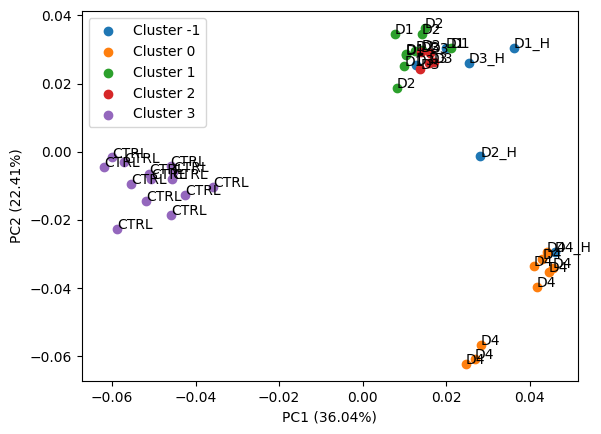

In [24]:
# PCoA plot
distance_matrix = DistanceMatrix(unifrac_distances)
pcoa_results = pcoa(distance_matrix)

pcoa_results.samples['cluster'] = dbscan.labels_
pcoa_results.samples['real_label'] = [samples_info[samples_info['Run'] == sample]['category'].values[0] for sample in unifrac_distances.index]

fig, ax = plt.subplots()
for cluster in np.unique(pcoa_results.samples['cluster']):
    df_cluster = pcoa_results.samples[pcoa_results.samples['cluster'] == cluster]
    ax.scatter(df_cluster['PC1'], df_cluster['PC2'], label=f'Cluster {cluster}')
    # Add text label with real label
    for i, row in enumerate(df_cluster.iterrows()):
        ax.annotate(row[1]['real_label'], (row[1]['PC1'], row[1]['PC2']))

# Show var explained by component on the axes
ax.set_xlabel(f'PC1 ({pcoa_results.proportion_explained.iloc[0] * 100:.2f}%)')
ax.set_ylabel(f'PC2 ({pcoa_results.proportion_explained.iloc[1] * 100:.2f}%)')

ax.legend()
plt.show()